In [122]:
import pandas as pd 
import numpy as np 

# getting NamUs Missing Persons database in 3 parts 
db1_missing = pd.read_csv("data/missing-namus-first-pull.csv")
db2_missing = pd.read_csv("data/missing-namus-second-pull.csv") 
db3_missing = pd.read_csv("data/missing-namus-third-pull.csv") 

# combining all 3 into one dataframe 
missing_df = pd.concat([db1_missing, db2_missing, db3_missing], ignore_index=True, sort=False)

In [123]:
missing_df.head()

,Case Number,DLC,Legal Last Name,Legal First Name,Missing Age,City,County,State,Biological Sex,Race / Ethnicity,Date Modified
0,MP128712,09/04/2024,Campirano,Nixon,16 Years,Goodyear,Maricopa,AZ,Male,White / Caucasian,09/06/2024
1,MP128606,08/31/2024,Batra,Anjali,18 Years,Morgan Hill,Santa Clara,CA,Female,Other,09/04/2024
2,MP128466,08/30/2024,CLARK,JOSHUA,35 Years,Mulberry,Polk,FL,Male,White / Caucasian,09/06/2024
3,MP128454,08/30/2024,Turney-Long,Alinda,16 Years,Winter Haven,Polk,FL,Female,White / Caucasian,09/06/2024
4,MP128473,08/30/2024,COTE,KATHY,78 Years,West Palm Beach,Palm Beach,FL,Female,White / Caucasian,09/06/2024


In [ ]:
# State

In [124]:
state_df_1 = missing_df["State"]

In [125]:
state_df_1.describe()

count     25060
unique       55
top          CA
freq       3561
Name: State, dtype: object

In [126]:
state_df_1.unique()

# 50 states
# + 
# District of Columbia, Puerto Rico, Guam, Mariana Islands, Virgin Islands 

array(['AZ', 'CA', 'FL', 'AR', 'CT', 'AL', 'CO', 'AK', 'DE', 'DC', 'MS',
       'MI', 'OK', 'NC', 'IL', 'PA', 'HI', 'KY', 'SD', 'MD', 'MT', 'GA',
       'NV', 'NJ', 'NY', 'NM', 'MO', 'OR', 'ND', 'LA', 'SC', 'MA', 'NE',
       'IN', 'OH', 'MN', 'KS', 'NH', 'ME', 'IA', 'ID', 'RI', 'PR', 'GU',
       'MP', 'TX', 'TN', 'UT', 'VA', 'WI', 'WA', 'WY', 'WV', 'VT', 'VI'],
      dtype=object)

In [127]:
import collections
print(len([i for i, cnt in collections.Counter(state_df_1).items() if cnt > 1]))

55


In [128]:
state_df_1.info()

<class 'pandas.core.series.Series'>
RangeIndex: 25060 entries, 0 to 25059
Series name: State
Non-Null Count  Dtype 
--------------  ----- 
25060 non-null  object
dtypes: object(1)
memory usage: 195.9+ KB


In [ ]:
# DLC 

In [129]:
dlc_missing_1 = missing_df["DLC"]
dlc_missing_1.head()

0    09/04/2024
1    08/31/2024
2    08/30/2024
3    08/30/2024
4    08/30/2024
Name: DLC, dtype: object

In [130]:
dlc_missing_1.nunique()

12159

In [131]:
dlc_missing_1.describe()

count          25060
unique         12159
top       01/01/2001
freq              17
Name: DLC, dtype: object

In [132]:
dlc_missing_1.info()

<class 'pandas.core.series.Series'>
RangeIndex: 25060 entries, 0 to 25059
Series name: DLC
Non-Null Count  Dtype 
--------------  ----- 
25060 non-null  object
dtypes: object(1)
memory usage: 195.9+ KB


In [133]:
age = missing_df["Missing Age"]
age.head()

0    16 Years
1    18 Years
2    35 Years
3    16 Years
4    78 Years
Name: Missing Age, dtype: object

In [134]:
# in case we need to drop an idx
drop_row_idx = []

# purpose: make every age value into a numerical value 
def ageToNumerical(df): 
    for idx, i in enumerate(df["Missing Age"]): 
        # for null/empty/nan values
        if pd.isna(i) or i == "" or isinstance(i, (int, float)) or pd.isnull(i): 
            drop_row_idx.append(idx) 

    # handling special cases 
        # 1 - 10 age 
        elif str(i).strip() == '< 1 Year' or str(i).strip() == '1 - 2 Years': 
            df.loc[idx, "Missing Age"] = 1

        elif str(i).strip() == '3 - 4 Years': 
            df.loc[idx, "Missing Age"] = 3

        # 10 - 20 age 
        elif str(i).strip() == '14 - 15 Years': 
            df.loc[idx, "Missing Age"] = 14

        elif str(i).strip() == '15 - 17 Years': 
            df.loc[idx, "Missing Age"] = 16

        elif str(i).strip() == '16 - 18 Years' or str(i).strip() == '16 - 17 Years': 
            df.loc[idx, "Missing Age"] = 17

        elif str(i).strip() == '18 - 20 Years': 
            df.loc[idx, "Missing Age"] = 19


        # 20 - 30 age
        elif str(i).strip() == '21 - 22 Years': 
            df.loc[idx, "Missing Age"] = 21

        elif str(i).strip() == '23 - 24 Years' or str(i).strip() == '23 - 25 Years': 
            df.loc[idx, "Missing Age"] = 23

        elif str(i).strip() == '29 - 31 Years' or str(i).strip() == '25 - 35 Years' or str(i).strip() == '25 - 39 Years': 
            df.loc[idx, "Missing Age"] = 30

        # 30 - 40 age 
        elif str(i).strip() == '30 - 40 Years' or str(i).strip() == '35 - 37 Years' or str(i).strip() == '36 - 37 Years' or str(i).strip() == '33 - 34 Years' or str(i).strip() == '34 - 35 Years': 
            df.loc[idx, "Missing Age"] = 35

        elif str(i).strip() == '37 - 38 Years' or str(i).strip() == '30 - 31 Years': 
            df.loc[idx, "Missing Age"] = 37

        elif str(i).strip() == '39 - 41 Years' or str(i).strip() == '40 - 41 Years': 
            df.loc[idx, "Missing Age"] = 40

        # 40 - 50 age 
        elif str(i).strip() == '42 - 44 Years' or str(i).strip() == '40 - 47 Years' or str(i).strip() == '40 - 42 Years' or str(i).strip() == '44 - 45 Years' or str(i).strip() == '43 - 44 Years': 
            df.loc[idx, "Missing Age"] = 43

        elif str(i).strip() == '49 - 50 Years': 
            df.loc[idx, "Missing Age"] = 50

        # 50 - 60 age 
        elif str(i).strip() == '50 - 60 Years' or str(i).strip() == '51 - 52 Years': 
            df.loc[idx, "Missing Age"] = 55

        elif str(i).strip() == '55 - 65 Years' or str(i).strip() == '59 - 60 Years': 
            df.loc[idx, "Missing Age"] = 60

        elif str(i).strip() == '56 - 60 Years': 
            df.loc[idx, "Missing Age"] = 58

        # senior 
        elif str(i).strip() == '65 - 71 Years' or str(i).strip() == '80 - 82 Years': 
            df.loc[idx, "Missing Age"] = 70

    # most common cases
        # ex. "20 Years" 
        else: 
            df.loc[idx, "Missing Age"] = i[0:-5]

    # string to float 
    df["Missing Age"] = df["Missing Age"].astype(float)

    return df 
    

missing_df_1 = ageToNumerical(missing_df) 

In [135]:
# drop nan/null columns 
print(drop_row_idx)
missing_df_1 = missing_df.drop(index=drop_row_idx)

[3191, 3470, 5003, 5504, 9450]


In [136]:
missing_df_1.head()

,Case Number,DLC,Legal Last Name,Legal First Name,Missing Age,City,County,State,Biological Sex,Race / Ethnicity,Date Modified
0,MP128712,09/04/2024,Campirano,Nixon,16.0,Goodyear,Maricopa,AZ,Male,White / Caucasian,09/06/2024
1,MP128606,08/31/2024,Batra,Anjali,18.0,Morgan Hill,Santa Clara,CA,Female,Other,09/04/2024
2,MP128466,08/30/2024,CLARK,JOSHUA,35.0,Mulberry,Polk,FL,Male,White / Caucasian,09/06/2024
3,MP128454,08/30/2024,Turney-Long,Alinda,16.0,Winter Haven,Polk,FL,Female,White / Caucasian,09/06/2024
4,MP128473,08/30/2024,COTE,KATHY,78.0,West Palm Beach,Palm Beach,FL,Female,White / Caucasian,09/06/2024


In [137]:
age_1 = missing_df_1["Missing Age"]
age_1.head()

0    16.0
1    18.0
2    35.0
3    16.0
4    78.0
Name: Missing Age, dtype: float64

In [138]:
age_1.describe()

count    25055.000000
mean        34.406546
std         17.279730
min          1.000000
25%         21.000000
50%         32.000000
75%         45.000000
max        116.000000
Name: Missing Age, dtype: float64

In [139]:
age_1.info()

<class 'pandas.core.series.Series'>
Index: 25055 entries, 0 to 25059
Series name: Missing Age
Non-Null Count  Dtype  
--------------  -----  
25055 non-null  float64
dtypes: float64(1)
memory usage: 391.5 KB


In [140]:
age_1.isnull().sum()

np.int64(0)

In [ ]:
# Gender 

In [141]:
gender = missing_df_1["Biological Sex"]
gender.head()

0      Male
1    Female
2      Male
3    Female
4    Female
Name: Biological Sex, dtype: object

In [142]:
gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

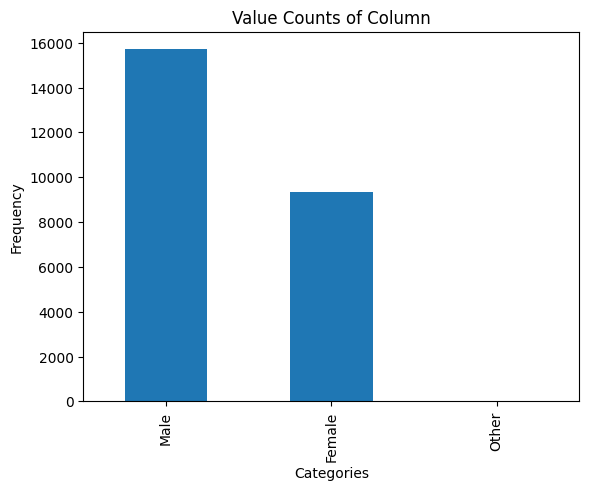

In [143]:
import matplotlib.pyplot as plt

# Get value counts
value_counts = gender.value_counts()

# Plot the value counts
value_counts.plot(kind='bar')

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Value Counts of Column')

# Show plot
plt.show()

In [144]:
gender.value_counts()

Biological Sex
Male      15702
Female     9347
Other         6
Name: count, dtype: int64

In [ ]:
# Ethnicity 

In [145]:
ethnicity = missing_df_1["Race / Ethnicity"]
ethnicity.head()

0    White / Caucasian
1                Other
2    White / Caucasian
3    White / Caucasian
4    White / Caucasian
Name: Race / Ethnicity, dtype: object

In [146]:
ethnicity.nunique()

75

In [147]:
# purpose: reduce Race/Ethnicity categories 
def reduceRaceCategories(df): 
    # new column for new race categories
    df["Race Category"] = ""

    for idx, i in enumerate(df["Race / Ethnicity"]): 
        # to new column for race category 
        if i == "Hispanic / Latino": 
            df.loc[idx, "Race Category"] = "Hispanic / Latino" 

        elif i == "White / Caucasian": 
            df.loc[idx, "Race Category"] = "White / Caucasian" 
            
        elif i == "Black / African American": 
            df.loc[idx, "Race Category"] = "Black / African American" 
            
        elif i == "American Indian / Alaska Native": 
            df.loc[idx, "Race Category"] = "American Indian / Alaska Native" 
            
        elif i == "Asian": 
            df.loc[idx, "Race Category"] = "Asian"
        # for mixed races / other
        else: 
            df.loc[idx, "Race Category"] = "Mix / Other / Unknown"

    df = df.drop(["Race / Ethnicity"], axis=1)

    return df 

missing_df_2 = reduceRaceCategories(missing_df_1) 

In [148]:
for idx, i in enumerate(missing_df_2["Race Category"]): 
    if pd.isna(i) or str(i).strip() == "": 
        missing_df_2.loc[idx, "Race Category"] = "Mix / Other / Unknown" 
        print("Empty")

missing_df_2["Race Category"] = missing_df_2["Race Category"].replace(r'^\s*$', np.nan, regex=True)
missing_df_2["Race Category"].fillna("Mix / Other / Unknown", inplace=True)

Empty
Empty
Empty
Empty
Empty


C:\Users\Jason Rubio\AppData\Local\Temp\ipykernel_19340\3086652693.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  missing_df_2["Race Category"].fillna("Mix / Other / Unknown", inplace=True)


In [150]:
ethnicity = missing_df_2["Race Category"]
ethnicity.value_counts()

Race Category
White / Caucasian                  14066
Black / African American            4084
Hispanic / Latino                   3465
Mix / Other / Unknown               2071
American Indian / Alaska Native      797
Asian                                577
Name: count, dtype: int64

In [151]:
missing_df_2.head()

,Case Number,DLC,Legal Last Name,Legal First Name,Missing Age,City,County,State,Biological Sex,Date Modified,Race Category
0,MP128712,09/04/2024,Campirano,Nixon,16.0,Goodyear,Maricopa,AZ,Male,09/06/2024,White / Caucasian
1,MP128606,08/31/2024,Batra,Anjali,18.0,Morgan Hill,Santa Clara,CA,Female,09/04/2024,Mix / Other / Unknown
2,MP128466,08/30/2024,CLARK,JOSHUA,35.0,Mulberry,Polk,FL,Male,09/06/2024,White / Caucasian
3,MP128454,08/30/2024,Turney-Long,Alinda,16.0,Winter Haven,Polk,FL,Female,09/06/2024,White / Caucasian
4,MP128473,08/30/2024,COTE,KATHY,78.0,West Palm Beach,Palm Beach,FL,Female,09/06/2024,White / Caucasian


In [152]:
#Export database 

from IPython.display import FileLink, FileLinks

missing_df_2.to_csv('./ready-search-missing-person.csv', index=False)

FileLinks('./ready-search-missing-person.csv')

ValueError: Cannot display a file using FileLinks. Use FileLink to display './ready-search-missing-person.csv'.